In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e4/sample_submission.csv
/kaggle/input/playground-series-s4e4/train.csv
/kaggle/input/playground-series-s4e4/test.csv


### <u> Objective </u>
* ### To predict the age of abalone from various physical measurements

### <u> Tasks </u>
* ### Validate all the assumptions
* ### Compute all the regression evaluation metrics
* ### Comment on the best evaluation metrics for this problem


In [2]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipykernel_18/2550962272.py:4: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  from numpy import math


In [3]:
# Importing the dataset
train_data = pd.read_csv('/kaggle/input/playground-series-s4e4/train.csv')
test_data = pd.read_csv('/kaggle/input/playground-series-s4e4/test.csv')

### Merge datasets

In [4]:
df=pd.concat([train_data, test_data])

In [5]:
# first overview of the data 
df.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11.0
1,1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11.0
2,2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6.0
3,3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10.0
4,4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9.0


In [6]:
df.shape

(151026, 10)

In [7]:
# getting the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 151026 entries, 0 to 60410
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              151026 non-null  int64  
 1   Sex             151026 non-null  object 
 2   Length          151026 non-null  float64
 3   Diameter        151026 non-null  float64
 4   Height          151026 non-null  float64
 5   Whole weight    151026 non-null  float64
 6   Whole weight.1  151026 non-null  float64
 7   Whole weight.2  151026 non-null  float64
 8   Shell weight    151026 non-null  float64
 9   Rings           90615 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 12.7+ MB


In [8]:
df.describe()

,id,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
count,151026.000000,151026.000000,151026.000000,151026.000000,151026.000000,151026.000000,151026.000000,151026.000000,90615.000000
mean,75512.500000,0.517230,0.401792,0.135579,0.789446,0.340958,0.169421,0.225989,9.696794
std,43597.595215,0.117974,0.097804,0.038075,0.457637,0.204345,0.100833,0.130052,3.176221
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,37756.250000,0.445000,0.345000,0.110000,0.419500,0.177500,0.086500,0.120000,8.000000
50%,75512.500000,0.545000,0.425000,0.140000,0.799500,0.329500,0.166000,0.225000,9.000000
75%,113268.750000,0.600000,0.470000,0.160000,1.068000,0.463500,0.232500,0.305000,11.000000
max,151025.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


We can clearly see that average age of abalone is somewhat around 9 years and the maximum age is 29 year , it has also seen that some of the minimum heights are 0.

In [9]:
# Get all entries where Height is 0
zero_height = df.query('Height == 0')
zero_height

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
7025,7025,I,0.315,0.230,0.0,0.1340,0.0545,0.0245,0.3505,8.0
14208,14208,I,0.430,0.340,0.0,0.3440,0.1880,0.0705,0.1050,8.0
32078,32078,M,0.470,0.355,0.0,0.5785,0.2965,0.1550,0.1360,7.0
52324,52324,I,0.315,0.230,0.0,0.1340,0.0530,0.0375,0.3505,7.0
70295,70295,I,0.430,0.340,0.0,0.4060,0.2035,0.0960,0.1230,7.0
90295,90295,M,0.430,0.325,0.0,0.3335,0.1350,0.0585,0.1050,10.0
34067,124682,M,0.560,0.445,0.0,0.8725,0.3050,0.1900,0.3050,NaN
42004,132619,I,0.270,0.195,0.0,0.0840,0.0250,0.0490,0.0310,NaN


In [10]:
zero_height.shape

(8, 10)

In [11]:
# Get mean and median height for those entires
mean_height = df['Height'].mean()
median_height = df['Height'].median()

print("Mean Height:", mean_height)
print("Median Height:", median_height)

Mean Height: 0.13557886721491663
Median Height: 0.14


we can replace all the zero values with the median values.

In [12]:
# Replace zero values with NaN
df['Height'] = df['Height'].replace(0, median_height)

In [13]:
# Confirm zero values are replaced
df['Height'].min()

0.004

In [14]:
# Check for missing values
print(df.isnull().sum())

id                    0
Sex                   0
Length                0
Diameter              0
Height                0
Whole weight          0
Whole weight.1        0
Whole weight.2        0
Shell weight          0
Rings             60411
dtype: int64


### Duplicate check

In [15]:
# Dataset Duplicate Value Count
duplicate_rows =  df.duplicated().value_counts()
print(f'All the False value are for non-duplicate rows: {duplicate_rows}')

All the False value are for non-duplicate rows: False    151026
Name: count, dtype: int64


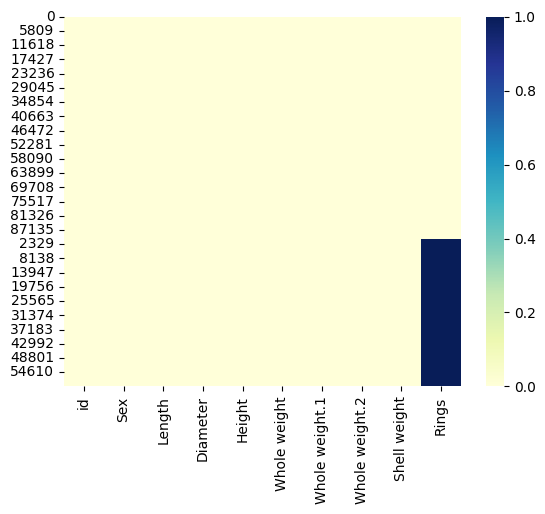

In [16]:
# Creating a heatmap of missing values
sns.heatmap(df.isnull(), cmap="YlGnBu")
plt.show()

Few points on our dataset, so that we might get little intution of what we have done in some above codes:

* The size of our data contains 1,51,026 columns & 10 Rows in our dataset.
* There are no duplicate rows in our dataframe.
* As we have also seen that there are zero null entries in our dataset.



In [17]:
# Dataset Columns
#checking features name of our column
df.columns

Index(['id', 'Sex', 'Length', 'Diameter', 'Height', 'Whole weight',
       'Whole weight.1', 'Whole weight.2', 'Shell weight', 'Rings'],
      dtype='object')

#### Check Unique Values for each variable.

In [18]:
# Check Unique Values for each variable.
numeric = df.select_dtypes(include=[np.number]).columns
for num_col in numeric:
    print(f"{num_col} : {df[num_col].nunique()} uniqueness variable(s)")

id : 151026 uniqueness variable(s)
Length : 167 uniqueness variable(s)
Diameter : 143 uniqueness variable(s)
Height : 111 uniqueness variable(s)
Whole weight : 3348 uniqueness variable(s)
Whole weight.1 : 1885 uniqueness variable(s)
Whole weight.2 : 1026 uniqueness variable(s)
Shell weight : 1180 uniqueness variable(s)
Rings : 28 uniqueness variable(s)


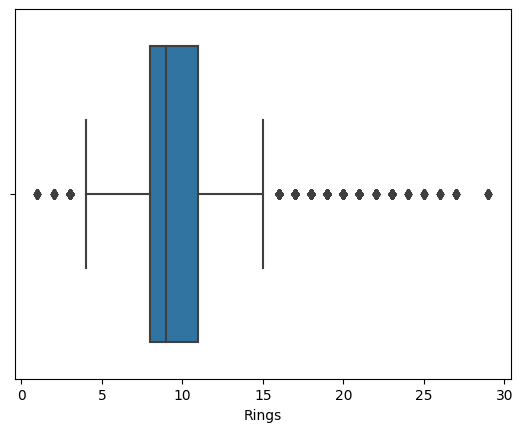

In [19]:
# Outlier detection
sns.boxplot(x=df["Rings"])
plt.show()

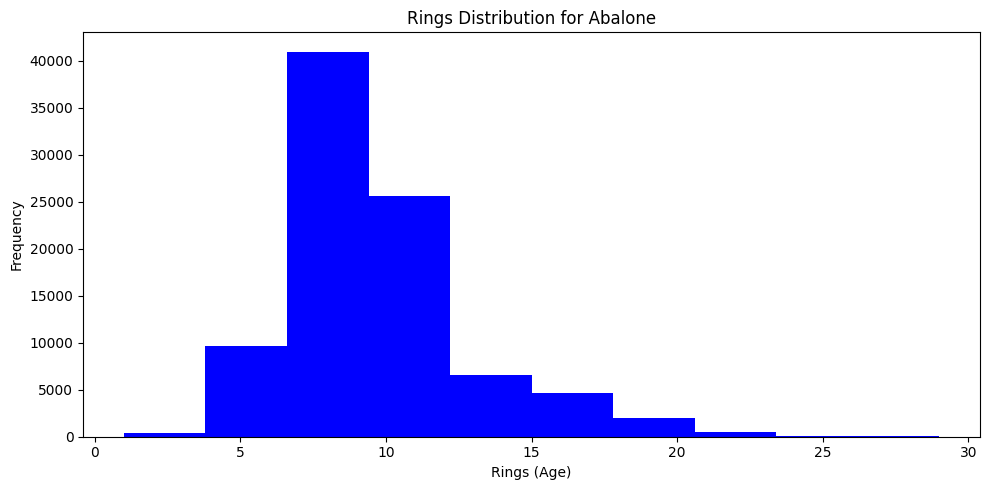

In [20]:
fig, ax = plt.subplots(figsize=(10,5))

df['Rings'].plot(kind='hist', color='blue', ax=ax)
ax.set_xlabel('Rings (Age)')
ax.set_title('Rings Distribution for Abalone')

plt.tight_layout()
plt.show()

Having reviewed the graph, it's evident that the optimal range for abalone Rings falls between 8 to 12. While it's uncommon to come across abalones younger than 5 Rings, encountering individuals with up to 20 Rings is not unusual. This visual representation provides valuable insights into the diverse lifespan distribution of abalones, offering a clearer understanding of their age variability.

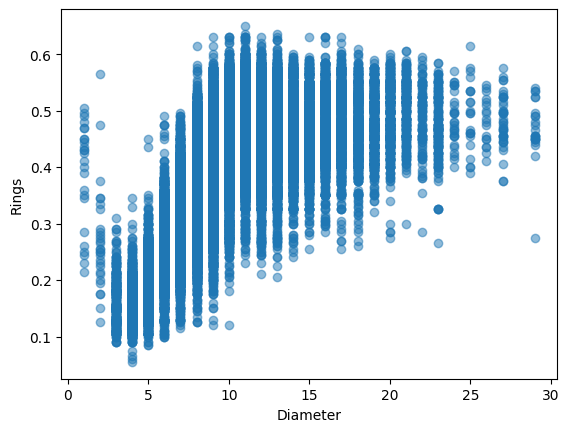

In [21]:
# Chart - 9 visualization code
# data = df['Rings']
plt.scatter(df.Rings, df.Diameter ,  alpha=0.5)
plt.ylabel('Rings')
plt.xlabel('Diameter')
plt.show()

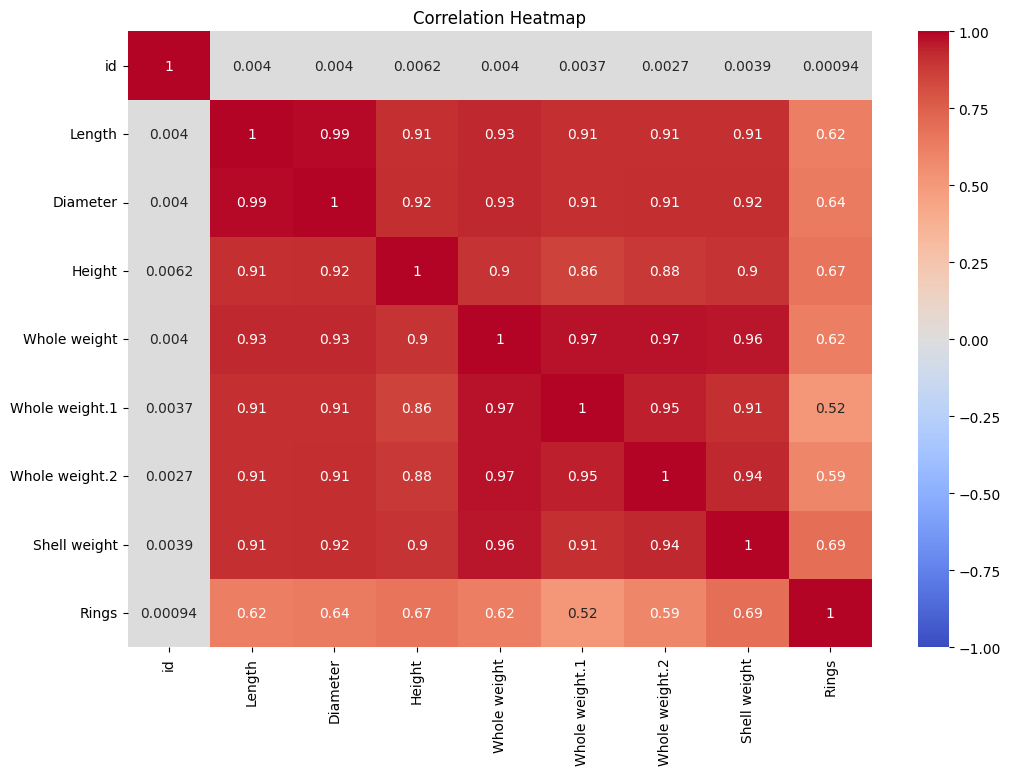

In [22]:
# Drop non-numeric columns
numeric_df = df.select_dtypes(include='number')

# Calculate correlation
correlation = numeric_df.corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()